# Welcome to Big Data!!!

## Today we are going to analyze Rainfall data from central Park to get you started

### We are going to do this all in a Jupyer notebook which was formerly called iPython.  This will take some getting used to. You actually do your programming in a window in a web browser or in a program.  But you are not online.  You are running off of your own coputer.  But we will teach you all you need to do.  Make sure to type everything you see correctly. All syntax matters including capital letters and punctuation. 

Ok, Lets get you started.  But make sure you read the syllabus and get a binder to keep the handouts.  You need to do the code.org also!

We are going to use [Anaconda python](http://continuum.io/).    We have used [Enthought Canopy](https://www.enthought.com/products/canopy/) but anaconda seems to work better.  

Look on the course site for directions to open Anaconda and then you can move around directories.  Remember nothing gets saved on the school computers. so whatever you save each day you need to email to yourself or save some home

Open Jupyter notebook like in the video

Now we are in iPython!!!! 

You see that I am using Markdown to add these notes. You make markdown by choosing Markdown above you can change from code to Markdown.  Notes are essential to understanding everything.  Please make a new cell and add some notes!  We will do more of this later.  If you download the notebook from Courseworks under syllabus you can double click on the notes and see how I added links!  I will show you how to add equations and images later!  

But we wanted to analyze precipitation data from Central Park. What questions could we ask and answer?  I have downloaded the data from 1876 onward!  I want to know the precipiation in the month I was born?  I want to know the annual average precipiation in Central Park and I also want to know what monthly Precipitation looks like.   Lets see if we can figure that out today.  We are going to dive in really deep the first class and show you the power of programming.  Then over the course of the semester I will teach you how to do this on your own.  So enjoy the first analysis, see what we can do and then work on learning it yourself during the semester.

The first thing we will do is import the python libraries that we will use.  When programming you don't use the whole Python programming language.  You have a basic part of Python that is always turned-on but also you import or turn on the parts of the language that you will use for your analysis.  You will learn about different libraries as the semester progresses.  

Type in what you see below.  Then to execute the code hit shift-enter.  The little circle will fill in on the top right as the computer computes code.  It needs to be exact, uppercase, lowercase etc.   TYPE EXACTLY!

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib # for plot data
import matplotlib.pylab as plt


Now we need to get our data.  I will use github a lot this semester. It is a website that allows you to update and share code and to keep track of it.  It is like Dropbox on steroids.  The information for this class is at this webside. 

https://github.com/bmaillou/BigDataPython

follow the link to central park csv file. Then click on it and look at the raw data.  csv files are a great way of getting data. csv means commas seperated variables.  It is just a text file with data seperated by commas.  now copy the link so we can add it below.  The link goes to the url. Then we are using the pandas reader to get the data.  We are then indexing by Date to organize. In pandas data is usually called "df" for dataframes.  It is almost like a monster excel sheet.

In [2]:
url='https://raw.githubusercontent.com/bmaillou/BigDataPython/master/central_park.csv'

df = pd.read_csv(url,index_col='DATE',parse_dates=['DATE']) #This is central park data

Now the data is in the computer as df.  You could just type df to see it. I typed df.head() to see the first 5 rows.  Type df.tail() to see the last 5. 

In [3]:
df.tail()

,STATION,STATION_NAME,PRCP,TOBS
DATE,,,,
2014-11-06,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,94.0,NaN
2014-11-07,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,0.0,NaN
2014-11-08,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,0.0,NaN
2014-11-09,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,0.0,NaN
2014-11-10,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,0.0,NaN


You can do a lot with the data.  For some quick ideas type df. with the period and hit tab. The list of functions comes up.

But lets make a quick and dirty plot.  To plot all the data you type df.plot() and then to show the plot you type plt.show()

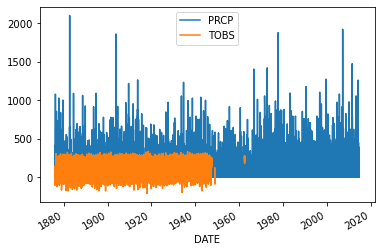

In [4]:
df.plot()
plt.show()

I want to know what type of data I have.  So i need to check the data type,  show how to type data1.  Hit tab and then see what we can do.  

In [5]:
df.dtypes

STATION          object
STATION_NAME     object
PRCP            float64
TOBS            float64
dtype: object

But pandas has better built in functions.  try df.info() to learn more about your data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50699 entries, 1876-01-01 to 2014-11-10
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION       50699 non-null  object 
 1   STATION_NAME  50699 non-null  object 
 2   PRCP          50596 non-null  float64
 3   TOBS          25882 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.9+ MB


We are only interested in precipitation today.  So lets just plot it. We can subchoose just that column.  

<AxesSubplot:xlabel='DATE'>

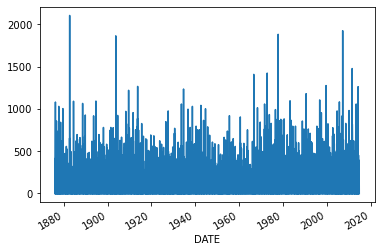

In [7]:
df['PRCP'].plot()

We can use describe to look at the description of the data.

In [8]:
df.describe()

,PRCP,TOBS
count,50596.000000,25882.000000
mean,31.572773,119.081562
std,89.699235,98.968277
min,0.000000,-211.000000
25%,0.000000,39.000000
50%,0.000000,122.000000
75%,13.000000,206.000000
max,2103.000000,339.000000


Stop and think for a second.  What do the results mean above?  They say we have over 50,000 precipitation values!  We know something about them and we have done this really quickly!

Can you just show the describe for Precitation?  Use what you learned above

count    50596.000000
mean        31.572773
std         89.699235
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       2103.000000
Name: PRCP, dtype: float64

what are the units?  
we can plot in inches
I looked it up and the data is in  10 mm.  
1mm =.0393 inches

Plus I am changing how I call the PRCP column. I am using the . notation.  

Plus look how I put a great comment in the code using #

<AxesSubplot:xlabel='DATE'>

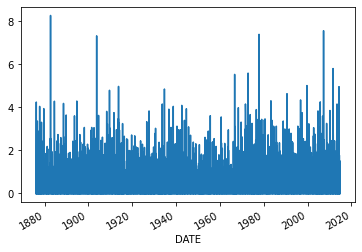

In [9]:
(df.PRCP/10.0*.0393).plot()  #we are doing the math and plotting at the same time!

Again, stop and think about the data?  What are the biggest rainstorms we have gotten?  How does this compare to some hurricanes you hear about on the news?? or some other big storm near you? What about Ida?

lets convert to inches so we can save it forever!

In [10]:
df.PRCP=(df.PRCP/10.0*.0393)

Check and make sure it worked using describe. Does the data make sense? 

Make sure not to convert twice above.  Everytime you convert is saves it.  Your numbers will keep getting smaller and smaller.....

If you convert more than once you have to go up and re-read in the data

count    50596.000000
mean         0.124081
std          0.352518
min          0.000000
25%          0.000000
50%          0.000000
75%          0.051090
max          8.264790
Name: PRCP, dtype: float64

can we just get yearly rainfall?  We can resample the data and sum all the rainfall for each year!  Plus look and I am adding a comment to the code below!

In [11]:
df['PRCP'].resample('A').sum()  #This just gave us yearly rainfall!

DATE
1876-12-31    41.71695
1877-12-31    40.14888
1878-12-31    48.60231
1879-12-31    39.00132
1880-12-31    36.59616
                ...   
2010-12-31    49.30971
2011-12-31    72.71679
2012-12-31    38.47470
2013-12-31    46.26789
2014-12-31    43.89417
Freq: A-DEC, Name: PRCP, Length: 139, dtype: float64

Now we could plot the yearly data!

<AxesSubplot:xlabel='DATE'>

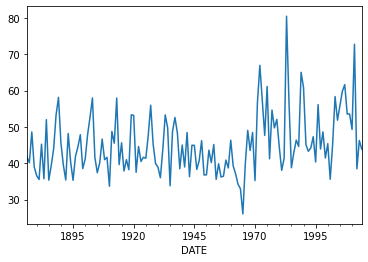

In [12]:
df['PRCP'].resample('A').sum().plot()

We could also make it a scatter plot with points and no line.  This is the power of plotting with matplotlib. You can change anything! 

go to http://matplotlib.org/1.3.1/examples/pylab_examples/filledmarker_demo.html
and choose your own color and style.  if you want to turn the line off do linestyle='none'

<AxesSubplot:xlabel='DATE'>

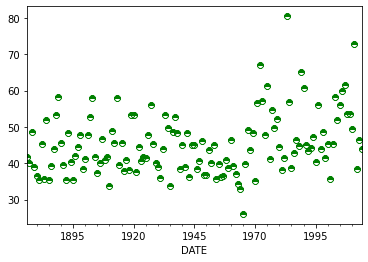

In [13]:
df['PRCP'].resample('A').sum().plot(marker='8',color='g',fillstyle='top',linestyle='none')

Can you use describe to give statistics on the annual data? How much rain fell on the wettest year?

count    139.000000
mean      45.165483
std        8.389918
min       26.075550
25%       39.144765
50%       43.945260
75%       48.735930
max       80.423520
Name: PRCP, dtype: float64

What if we only want to plot some of the data?  Lets plot from 1900 to 1920...

<AxesSubplot:xlabel='DATE'>

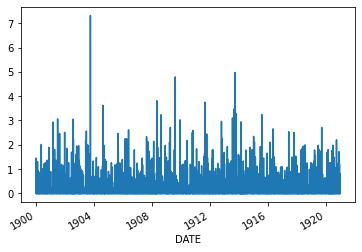

In [14]:
df.PRCP['1900':'1920'].plot()

or for just one year


<AxesSubplot:xlabel='DATE'>

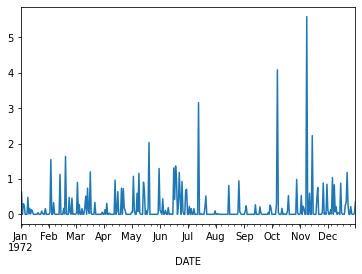

In [15]:
df.PRCP['1972'].plot()

or one month!

<AxesSubplot:xlabel='DATE'>

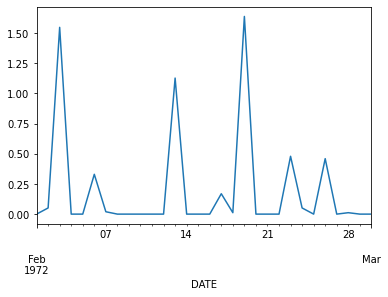

In [16]:
df.PRCP['02/01/1972':'03/01/1972'].plot()

Can you plot for the month and or year you were born?

Now we are going to do some big changes. (I am also showing you here that you can do bullets in the Markdown)
### My end point is to look at the monthly data in boxplots. 
- But to get there we need to resample to monthly. 
- Then we need to make a new column that lists the months. 
- Then we can make a boxplot!   

So lets start by making a new dataframe which is the data resampled by summing the monthly data. 



In [17]:
df_month=df.resample('M').sum()

Now we can describe the data

In [18]:
df_month.describe()

,PRCP,TOBS
count,1667.000000,1667.000000
mean,3.766048,1848.871626
std,2.141284,2683.204705
min,0.023580,-1886.000000
25%,2.295120,0.000000
50%,3.411240,0.000000
75%,4.782810,3861.500000
max,18.915090,8259.000000


So things appear to be working.  What does our data look like?

In [19]:
print (df_month) # a big difference between python 2 and 3 is you need parentheses on the print

               PRCP    TOBS
DATE                       
1876-01-31  0.94320   780.0
1876-02-29  4.80246    72.0
1876-03-31  8.77569   499.0
1876-04-30  3.05754  2578.0
1876-05-31  3.02217  4889.0
...             ...     ...
2014-07-31  5.58060     0.0
2014-08-31  2.24796     0.0
2014-09-30  1.20651     0.0
2014-10-31  5.76531     0.0
2014-11-30  0.71919     0.0

[1667 rows x 2 columns]


To make our plotting work we will need a new column that tells us just the month. So we are going to look at the index date and pull out the month and put it into a new column. 

In [20]:
df_month['month']=df_month.index.month

lets just look at 5 rows and see if it worked.  

In [21]:
df_month.head()  #head just gives you the first 5

,PRCP,TOBS,month
DATE,,,
1876-01-31,0.94320,780.0,1
1876-02-29,4.80246,72.0,2
1876-03-31,8.77569,499.0,3
1876-04-30,3.05754,2578.0,4
1876-05-31,3.02217,4889.0,5


Now lets make our boxplot!  you can google pandas boxplot to see how.  http://pandas.pydata.org/pandas-docs/stable/visualization.html  


### Foreshadowing.  I am going to ask you to use this by notation in a future class!  
this is a big hint.  remember column and by.  I AM GOING TO ASK THIS AGAIN!

Also, to make it look fancy I am showing the mean values and making it have a notch.  You can make both options False or just delete them.  They are extra arguments in the function.

<AxesSubplot:title={'center':'PRCP'}, xlabel='month'>

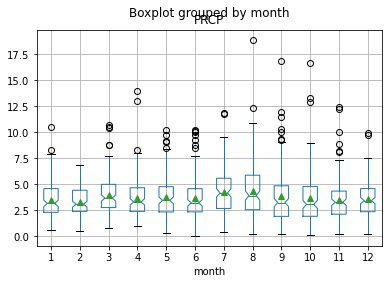

In [22]:
df_month.boxplot(column=['PRCP'],by='month',showmeans=True,notch=True)

the great thing about python is you can make a professional looking graph and save it and have it ready to use.  So lets do it.
*  First we turn on fancy graphs.  We do fig,ax=plt.subplots()  this lets us control all parts of the graph in terms of the axes and the overall figure.  
*  First we remove the title and suptitle by making them nothing.  ax.set_title('')   fig.suptitle('')   You could add titles if you wanted.
*  We label our y-axis.  Always label axes. ax.set_ylabel('Precipitation (inches)')
*  We make the x-axis nicer.
*  We make the label fonts bigger
*  We save the file.  I added some keywords to make the file nice.  the dpi is dots per inch so it has better resolution and the bbox makes sure nothing is cut off. 
*  You can decide if you want to turn off gridlines.  add grid=False
*  for a hard one we could add month of year instead of 1-12.  I used ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

I think that is a sharp graph!  You should be able to find it on your computer and mail it to yourself.

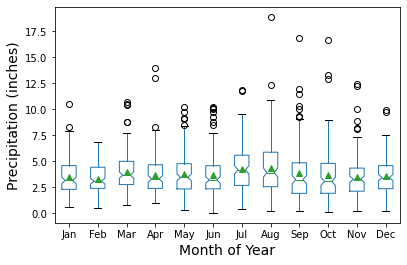

In [23]:
fig,ax=plt.subplots()
df_month.boxplot(column=['PRCP'],by='month',showmeans=True,notch=True,ax=ax,grid=False)
ax.set_title('')
fig.suptitle('')
ax.set_ylabel('Precipitation (inches)',fontsize=14)
ax.set_xlabel('Month of Year',fontsize=14)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
fig.savefig('Central-Park-Monthly-Precip.jpg',dpi=600,bbox_inches='tight')

I talk about making figure captions in the homework.  So lets make one here. Here is the definition of a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html#:~:text=A%20box%20plot%20is%20a,the%20range%20of%20the%20data)

Figure 1.  Boxplot of monthly precipitation Central Park, New York City from 1876 to 2015.  The indent is the mediat, the triangle is the mean, the box goes from Q1 to Q3 with the whiskers showing the range of the data and circles are outliers larger than 1.5 times the interquartile range.


We will also need to learn about how to talk about results.  We can see from the figure that precipitation does not systematically vary by month in Central Park and that the mean monthly precipitation is fairly uniform.  

to get the monthly data we can groupby month and the describe the data.  or just look at the mean. We will also only look at prcp.  As you can see rain is pretty uniform by month in NYC!

In [24]:
df_month.groupby('month').PRCP.mean()


month
1     3.463263
2     3.334789
3     3.995651
4     3.697536
5     3.755582
6     3.674013
7     4.253052
8     4.348163
9     3.870993
10    3.646531
11    3.527670
12    3.624314
Name: PRCP, dtype: float64

I hope you got some of these to work and are excited about what we can do.  You just analyzed 50,000 precipitation data points on your first day!  We are ready to begin learning data analysis and Python! But for next class we have to go back to the basics!